In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
from xgboost import plot_importance

In [3]:
import datetime

In [4]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [8]:
surge_1 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_surge_1.csv')
drop_1 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_drop_1.csv')
surge_2 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_surge_2.csv')
drop_2 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_drop_2.csv')
wave_1 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_wave_1.csv')
wave_2 = pd.read_csv('../../covid-proj/latest_dataset/ts/3day/segments/c1/df_m3_c1_wave_2.csv')

# Cluster 1 Surge 1 Model

In [9]:
surge_1_X = surge_1.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
surge_1_Y = surge_1['Case'].copy()

In [10]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 9, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [11]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [12]:
model_surge_1 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_surge_1, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(surge_1_X, surge_1_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s


[13:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([0.38598785, 0.26926303, 0.18060012, 0.12440042, 0.13759875,
       0.17060041, 0.25526814, 0.21824975, 0.22958083, 0.20042963,
       0.19240727, 0.18717513, 0.2107305 , 0.24759564, 1.63170581,
       1.15620694]), 'std_fit_time': array([0.08352903, 0.05755612, 0.01720134, 0.00952005, 0.0114829 ,
       0.03540311, 0.01075849, 0.0129826 , 0.00422157, 0.00825801,
       0.00492985, 0.00998664, 0.00439036, 0.05038961, 0.1021458 ,
       0.63605124]), 'mean_score_time': array([0.01120124, 0.01506457, 0.00440106, 0.00719895, 0.00380063,
       0.00619993, 0.0066

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.6s finished


In [50]:
test1 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [51]:
test1.fit(surge_1_X, surge_1_Y)

[20:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
r2 = r2_score(surge_1_Y,test1.predict(surge_1_X))
r2

0.9649273638508926

In [53]:
test1.get_booster().get_score(importance_type="total_gain")

{'elapsed': 199551.8751185,
 'WSPD': 3318.431511099999,
 'PM2.5': 25499.2746855,
 'SO2': 33486.26316,
 'TEMP': 39713.54317700001,
 'HUM': 27958.0523836,
 'NO2': 4092.8945779,
 'ACTV': 9294.261909499997,
 'PM10': 6897.980649,
 'O3': 5787.999179360001,
 'PRES': 7973.660067600001,
 'CO': 3840.5961163000006}

In [54]:
from sklearn.inspection import permutation_importance

In [63]:
surge_1_p = permutation_importance(test1, surge_1_X, surge_1_Y, n_repeats=10,random_state=0)

In [64]:
surge_1_p

{'importances_mean': array([0.03989711, 0.00533377, 0.13211275, 0.01263952, 0.00661484,
        0.01388587, 0.05640128, 0.02777188, 0.00997107, 0.14298122,
        0.0155688 , 0.92373883]),
 'importances_std': array([0.0096938 , 0.00150676, 0.0155668 , 0.00289636, 0.00128921,
        0.00292528, 0.00719603, 0.00373142, 0.00286266, 0.0195258 ,
        0.00190059, 0.05712728]),
 'importances': array([[0.05528023, 0.04968154, 0.03685729, 0.04704255, 0.03144972,
         0.02878541, 0.02711929, 0.05034902, 0.04132106, 0.03108496],
        [0.00707086, 0.00521199, 0.00384518, 0.00633052, 0.00643509,
         0.00566503, 0.00665656, 0.00168749, 0.00503497, 0.00539998],
        [0.14977071, 0.14413612, 0.10833879, 0.1198334 , 0.15837713,
         0.12927947, 0.1350082 , 0.11266648, 0.14097969, 0.12273747],
        [0.01200761, 0.01475986, 0.01689071, 0.01034156, 0.01230334,
         0.00771325, 0.00894032, 0.01657175, 0.01408626, 0.01278052],
        [0.0067011 , 0.00681806, 0.00854735, 0.007

In [57]:
surge_1_X.columns

Index(['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3', 'HUM', 'PRES', 'WSPD',
       'TEMP', 'ACTV', 'elapsed'],
      dtype='object')

In [58]:
labels = ['PM2.5', 'PM10', 'SO${_2}$', 'CO', 'NO${_2}$', 'O${_3}$', 'Relative humidity', 'Atmospheric pressure', 'Wind speed', 'Air temperature', 'Degree of activeness','Days elapsed']

In [60]:
surge_1_pd = {}

In [65]:
c= 0
for i in labels:
    surge_1_pd[i] = surge_1_p['importances_mean'][c]
    c = c + 1

In [66]:
surge_1_pd

{'PM2.5': 0.03989710827959383,
 'PM10': 0.005333767386346455,
 'SO${_2}$': 0.13211274701801562,
 'CO': 0.012639518218823398,
 'NO${_2}$': 0.006614843123117953,
 'O${_3}$': 0.01388587066055752,
 'Relative humidity': 0.05640127717832757,
 'Atmospheric pressure': 0.02777187651730676,
 'Wind speed': 0.009971073620510052,
 'Air temperature': 0.14298122001351446,
 'Degree of activeness': 0.015568795466466844,
 'Days elapsed': 0.923738828722198}

In [67]:
import shap
explainer_surge_1 = shap.TreeExplainer(test1)

In [69]:
surge_1_shap_values = explainer_surge_1.shap_values(surge_1_X)
print(surge_1_shap_values)

[[ -1.2472136   -0.04703335  -5.247623   ...   3.7904034   -0.9043922
  -29.455435  ]
 [ -0.29013413  -0.8469411   -6.4838805  ...   3.603868    -0.858954
  -23.069405  ]
 [ -0.29013413  -0.23746584  -6.4934173  ...   3.784563    -0.7539113
  -18.577688  ]
 ...
 [  0.37962538   1.8196809    8.704688   ...   9.419268    -0.09695968
   26.453428  ]
 [ -0.24231833   1.5590075    8.657632   ...   9.419268    -0.2495933
   26.112963  ]
 [  5.9389772    1.4451379    7.6084003  ...  10.024788    -0.09695968
   27.554926  ]]


In [71]:
y_base_surge_1 = explainer_surge_1.expected_value
print(y_base_surge_1)


35.841606


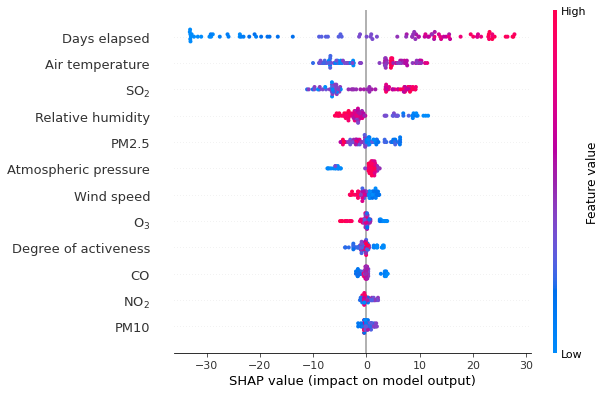

In [74]:
shap.summary_plot(surge_1_shap_values, surge_1_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_1.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_1.svg",format="svg",bbox_inches='tight')

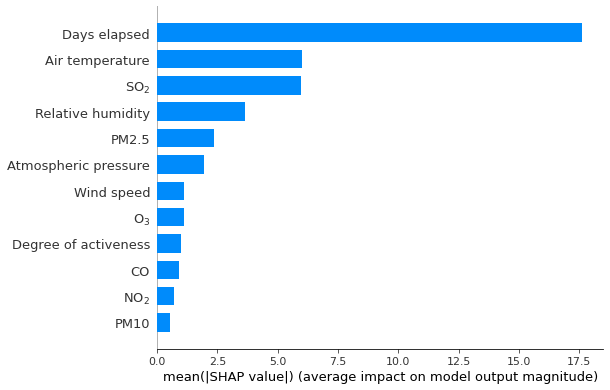

In [75]:
shap.summary_plot(surge_1_shap_values, surge_1_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_1_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_1_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Drop 1 Model

In [76]:
drop_1_X = drop_1.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
drop_1_Y = drop_1['Case'].copy()

In [84]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 8, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [78]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [79]:
model_drop_1 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_drop_1, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(drop_1_X, drop_1_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.7s


[20:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([ 0.60145917,  0.71610999,  0.83936739,  0.13685975, 18.64110675,
       32.23558011, 11.59838777,  6.30500307, 12.90387278,  3.53944149,
        0.20068049,  0.1506001 ,  0.18739996,  0.19740043,  0.18119946,
        0.13499951]), 'std_fit_time': array([1.54569734e-01, 3.21215388e-01, 1.08083121e-01, 2.92462805e-02,
       1.11279207e+01, 1.02150526e+00, 5.77407994e+00, 4.40924113e+00,
       1.81377358e-01, 4.43181221e+00, 1.02748862e-02, 9.24327557e-03,
       1.68242014e-02, 1.17410069e-02, 7.46719449e-03, 2.75824850e-02]), 'mean_score_time': array([0.055

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


In [85]:
test2 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [86]:
test2.fit(drop_1_X, drop_1_Y)

[20:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
r2 = r2_score(drop_1_Y,test2.predict(drop_1_X))
r2

0.9652646689574654

In [88]:
test2.get_booster().get_score(importance_type="total_gain")

{'elapsed': 240091.5534805,
 'ACTV': 45210.183181039974,
 'HUM': 7174.4262807000005,
 'O3': 45205.1266323,
 'CO': 3371.87661911,
 'PM2.5': 18864.634424522,
 'PM10': 23980.566567900005,
 'NO2': 14662.3912295,
 'PRES': 16841.133083209992,
 'WSPD': 8641.693915140002,
 'SO2': 6361.2058261,
 'TEMP': 10522.960933100001}

In [89]:
drop_1_p = permutation_importance(test2, drop_1_X, drop_1_Y, n_repeats=10,random_state=0)

In [90]:
drop_1_p

{'importances_mean': array([0.05420727, 0.02547839, 0.02089908, 0.00284288, 0.03629484,
        0.15956367, 0.00784175, 0.04335525, 0.0115472 , 0.01570848,
        0.04687644, 1.04401086]),
 'importances_std': array([0.0054829 , 0.00441372, 0.00206428, 0.0007372 , 0.00448576,
        0.01778934, 0.00095804, 0.00487056, 0.00126775, 0.00255266,
        0.00696338, 0.08856243]),
 'importances': array([[0.05183675, 0.04709674, 0.06245875, 0.04886001, 0.05165617,
         0.0610498 , 0.0470052 , 0.05984102, 0.05483045, 0.05743786],
        [0.03589818, 0.02791096, 0.02698174, 0.0187605 , 0.02367571,
         0.02584103, 0.0206293 , 0.02671018, 0.02341753, 0.02495878],
        [0.02301659, 0.01905151, 0.02192325, 0.01919653, 0.02232829,
         0.02049368, 0.0201706 , 0.0252185 , 0.01930871, 0.0182831 ],
        [0.00149244, 0.0037275 , 0.00202799, 0.0027708 , 0.00404909,
         0.00292726, 0.00299534, 0.00320148, 0.00214699, 0.00308985],
        [0.0318839 , 0.04072187, 0.03240852, 0.041

In [93]:
drop_1_pd = {}

In [94]:
c= 0
for i in labels:
    drop_1_pd[i] = drop_1_p['importances_mean'][c]
    c = c + 1

In [95]:
drop_1_pd

{'PM2.5': 0.054207273787849265,
 'PM10': 0.025478390433323617,
 'SO${_2}$': 0.020899075990746606,
 'CO': 0.002842875534132794,
 'NO${_2}$': 0.03629483735049434,
 'O${_3}$': 0.1595636688279621,
 'Relative humidity': 0.00784174832892377,
 'Atmospheric pressure': 0.04335524638710496,
 'Wind speed': 0.011547201923021966,
 'Air temperature': 0.015708475283458645,
 'Degree of activeness': 0.046876439613110596,
 'Days elapsed': 1.0440108585597376}

In [96]:
explainer_drop_1 = shap.TreeExplainer(test2)

In [97]:
drop_1_shap_values = explainer_drop_1.shap_values(drop_1_X)
print(drop_1_shap_values)

[[ -2.382358     3.3397284    1.90046    ...   0.27497354   1.8201681
   30.625206  ]
 [ -1.2861058    3.7106314    2.0984008  ...   0.40661195   1.7669523
   31.19217   ]
 [  1.163256     0.47965452   1.3500999  ...   0.4007986    1.4658055
   28.6985    ]
 ...
 [ -1.4638181   -0.1302389    0.5810022  ...  -0.5760632   -3.7945018
  -15.542251  ]
 [ -1.7008191   -0.41146538   0.3437232  ...  -0.5821335   -3.837142
  -15.424613  ]
 [ -1.6719058   -0.6024454    0.6686119  ...  -0.67069095  -3.2371266
  -13.011075  ]]


In [98]:
y_base_drop_1 = explainer_drop_1.expected_value
print(y_base_drop_1)


18.369799


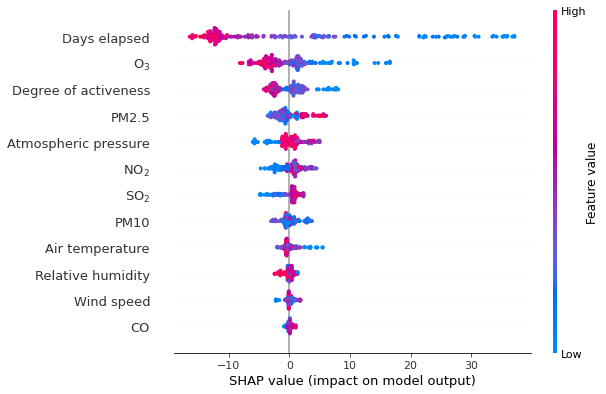

In [99]:
shap.summary_plot(drop_1_shap_values, drop_1_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_1.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_1.svg",format="svg",bbox_inches='tight')

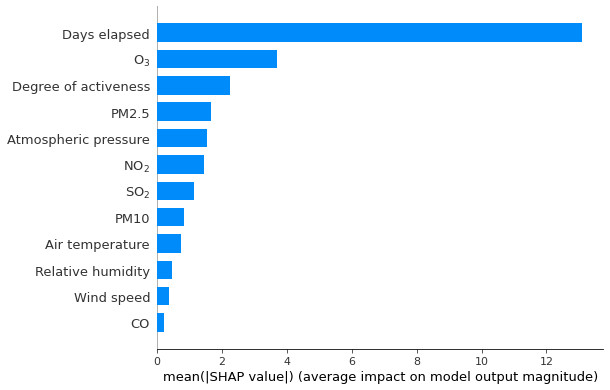

In [100]:
shap.summary_plot(drop_1_shap_values, drop_1_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_1_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_1_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Surge 2 Model

In [101]:
surge_2_X = surge_2.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
surge_2_Y = surge_2['Case'].copy()

In [102]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 8, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [103]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [104]:
model_surge_2 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_surge_2, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(surge_2_X, surge_2_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s


[20:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([4.37372818, 5.7099318 , 7.81718612, 7.13620276, 5.49443092,
       0.22120066, 0.17800026, 0.16159935, 0.22860069, 0.24080181,
       0.27120123, 0.23650088, 0.21209426, 0.22116685, 0.42249942,
       0.9471261 ]), 'std_fit_time': array([0.04324399, 1.64583289, 0.2062675 , 0.13596216, 2.63353296,
       0.01792637, 0.03326248, 0.01738542, 0.01287778, 0.01869118,
       0.02076121, 0.00733649, 0.0040451 , 0.01768578, 0.27817286,
       0.01352077]), 'mean_score_time': array([0.12060342, 0.13528523, 0.13134966, 0.03779988, 0.00619845,
       0.01019983, 0.0083

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.7s finished


In [105]:
test3 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [106]:
test3.fit(surge_2_X, surge_2_Y)

[20:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [107]:
r2 = r2_score(surge_2_Y,test3.predict(surge_2_X))
r2

0.9265758065888599

In [108]:
test3.get_booster().get_score(importance_type="total_gain")

{'HUM': 23127.983098710003,
 'elapsed': 16175.907013491997,
 'SO2': 730.5069982400001,
 'O3': 808.5896711999999,
 'PM2.5': 3837.6089122000003,
 'WSPD': 1414.4010312999994,
 'TEMP': 5601.242480700001,
 'PRES': 2022.2613782699998,
 'ACTV': 1444.91288578,
 'CO': 725.2670192500001,
 'PM10': 1710.1565565710005,
 'NO2': 577.4067216999999}

In [109]:
surge_2_p = permutation_importance(test3, surge_2_X, surge_2_Y, n_repeats=10,random_state=0)

In [110]:
surge_2_p

{'importances_mean': array([0.05409354, 0.02738709, 0.01215024, 0.00770299, 0.01345956,
        0.01688268, 0.31961557, 0.05221098, 0.07811639, 0.05643386,
        0.03252293, 0.61328917]),
 'importances_std': array([0.00794754, 0.0048804 , 0.00162796, 0.00195358, 0.00181637,
        0.00218551, 0.03801401, 0.00651974, 0.00906173, 0.01449477,
        0.00385481, 0.07179493]),
 'importances': array([[0.06184588, 0.04024494, 0.05622253, 0.05258033, 0.04564902,
         0.05852732, 0.06440928, 0.05172487, 0.06405103, 0.04568024],
        [0.03015844, 0.03092287, 0.02708588, 0.01614076, 0.02154137,
         0.02871766, 0.02543375, 0.03201186, 0.02931816, 0.03254019],
        [0.01177507, 0.01068454, 0.01330096, 0.01386083, 0.01153329,
         0.01058308, 0.0094122 , 0.01245226, 0.01271326, 0.01518692],
        [0.00780812, 0.005897  , 0.00461575, 0.00942578, 0.00543768,
         0.00758511, 0.00647214, 0.00963546, 0.00947152, 0.01068133],
        [0.01644566, 0.01405713, 0.01296455, 0.012

In [111]:
surge_2_pd = {}

In [112]:
c= 0
for i in labels:
    surge_2_pd[i] = surge_2_p['importances_mean'][c]
    c = c + 1

In [113]:
surge_2_pd

{'PM2.5': 0.05409354242538461,
 'PM10': 0.027387094629894783,
 'SO${_2}$': 0.012150242300809166,
 'CO': 0.0077029888889554535,
 'NO${_2}$': 0.013459563145382204,
 'O${_3}$': 0.016882680645006774,
 'Relative humidity': 0.31961557211368596,
 'Atmospheric pressure': 0.05221098175323609,
 'Wind speed': 0.07811638857686301,
 'Air temperature': 0.05643386258030734,
 'Degree of activeness': 0.03252292984142837,
 'Days elapsed': 0.6132891747527478}

In [114]:
explainer_surge_2 = shap.TreeExplainer(test3)

In [115]:
surge_2_shap_values = explainer_surge_2.shap_values(surge_2_X)
print(surge_2_shap_values)

[[ 0.05393872 -0.36930138 -0.11153249 ...  0.05634276  0.3386081
  -3.2055664 ]
 [ 0.03668196 -0.32053566 -0.10572816 ...  0.05574841  0.15700532
  -3.150194  ]
 [ 0.41766202 -0.2689582  -0.09520932 ...  0.09627934 -0.24579415
  -3.1218317 ]
 ...
 [-1.603474    0.19881016 -0.1699334  ... -1.8265537  -0.24717182
   8.844283  ]
 [-1.603474    0.17014545 -0.1699334  ... -1.8865812  -0.48000568
   8.844283  ]
 [-1.6163756   0.38814554 -0.1699334  ... -1.8784806  -0.71420443
   9.238854  ]]


In [116]:
y_base_surge_2 = explainer_surge_2.expected_value
print(y_base_surge_2)


4.649479


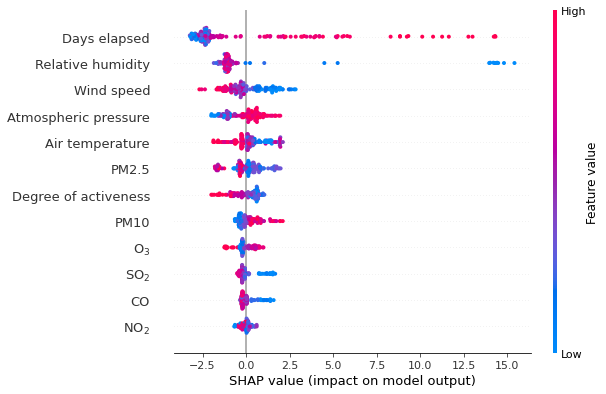

In [117]:
shap.summary_plot(surge_2_shap_values, surge_2_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_2.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_2.svg",format="svg",bbox_inches='tight')

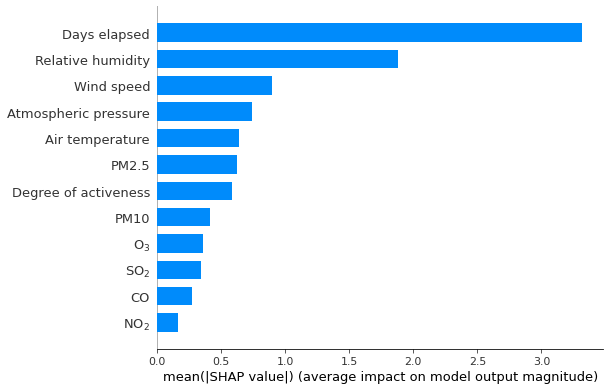

In [118]:
shap.summary_plot(surge_2_shap_values, surge_2_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_2_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_2_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Drop 2 Model

In [119]:
drop_2_X = drop_2.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
drop_2_Y = drop_2['Case'].copy()

In [120]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 8, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [121]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [122]:
model_drop_2 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_drop_2, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(drop_2_X, drop_2_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.6s


[20:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([22.97550941, 13.81714115,  0.08981061,  3.58975921, 10.48276181,
        5.20530806,  0.40445461,  0.15200047,  0.1787991 ,  0.1853991 ,
        0.17680092,  0.16919088,  0.19761152,  0.18635297,  0.16370969,
        0.23074365]), 'std_fit_time': array([2.49934586e-02, 1.11847084e+01, 6.87317209e-03, 1.42706166e+00,
       1.18969597e+00, 3.25498314e+00, 3.85994544e-01, 6.98571260e-03,
       1.62048319e-02, 9.52063455e-03, 8.90701511e-03, 7.55961056e-03,
       1.14924268e-02, 1.01066990e-02, 4.47006908e-03, 2.18246131e-01]), 'mean_score_time': array([0.017

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   37.2s finished


In [123]:
test4 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [124]:
test4.fit(drop_2_X, drop_2_Y)

[20:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
r2 = r2_score(drop_2_Y,test4.predict(drop_2_X))
r2

0.9490436546043284

In [126]:
test4.get_booster().get_score(importance_type="total_gain")

{'WSPD': 18839.041718899996,
 'elapsed': 13431.608228709996,
 'ACTV': 6077.332920369999,
 'NO2': 1187.9592154199997,
 'O3': 1420.1307559900001,
 'PRES': 7600.187140449997,
 'PM10': 6810.156980400001,
 'CO': 1295.2366992199998,
 'TEMP': 758.9711793199998,
 'SO2': 4349.4941129,
 'HUM': 1238.1602087899994,
 'PM2.5': 2402.508667779999}

In [127]:
drop_2_p = permutation_importance(test4, drop_2_X, drop_2_Y, n_repeats=10,random_state=0)

In [128]:
drop_2_p

{'importances_mean': array([0.02857489, 0.09953103, 0.05007281, 0.00937084, 0.01115109,
        0.01110368, 0.00750527, 0.17002425, 0.61622128, 0.00638696,
        0.10131548, 0.34441026]),
 'importances_std': array([0.00337586, 0.00753581, 0.01064777, 0.00257427, 0.00171806,
        0.00264909, 0.00186735, 0.02661943, 0.15052283, 0.00093217,
        0.01432412, 0.06683121]),
 'importances': array([[0.02610757, 0.03366248, 0.02958795, 0.03161113, 0.02475077,
         0.0289254 , 0.02426794, 0.02531124, 0.03378142, 0.02774304],
        [0.11357552, 0.1000002 , 0.10194027, 0.09213743, 0.09338467,
         0.10223193, 0.09814957, 0.1048328 , 0.10414185, 0.08491606],
        [0.05373405, 0.04949901, 0.04544143, 0.04392286, 0.06164448,
         0.07504802, 0.04480306, 0.0483408 , 0.03505022, 0.04324414],
        [0.00968297, 0.0066357 , 0.01113214, 0.00848932, 0.01352229,
         0.0121547 , 0.00773518, 0.01183119, 0.00720429, 0.00532065],
        [0.00937369, 0.01036981, 0.01190556, 0.009

In [129]:
drop_2_pd = {}

In [130]:
c= 0
for i in labels:
    drop_2_pd[i] = drop_2_p['importances_mean'][c]
    c = c + 1

In [131]:
drop_2_pd

{'PM2.5': 0.02857489403951121,
 'PM10': 0.09953103020529394,
 'SO${_2}$': 0.050072805852178895,
 'CO': 0.009370843503907433,
 'NO${_2}$': 0.01115109307638249,
 'O${_3}$': 0.011103683563416955,
 'Relative humidity': 0.0075052673646602616,
 'Atmospheric pressure': 0.1700242512179948,
 'Wind speed': 0.6162212825852739,
 'Air temperature': 0.0063869620526647575,
 'Degree of activeness': 0.10131548144446686,
 'Days elapsed': 0.34441026266606845}

In [132]:
explainer_drop_2 = shap.TreeExplainer(test4)

In [133]:
drop_2_shap_values = explainer_drop_2.shap_values(drop_2_X)
print(drop_2_shap_values)

[[ 0.19858451  3.03693     2.4336205  ...  0.1493801  -1.3328533
   7.651204  ]
 [-0.1901327   2.514773    3.116732   ... -0.14066917 -1.1181042
   8.26055   ]
 [ 0.43805853  2.514773    2.6673176  ... -0.15739636 -0.8646791
   7.5614967 ]
 ...
 [-0.95170385 -1.0283785  -0.14110751 ...  0.01194574 -0.9295558
  -1.9770194 ]
 [-0.874961   -1.0283785   0.24356346 ...  0.02030682 -0.82730085
  -1.9938512 ]
 [-1.1238825  -0.9444285   0.78863096 ... -0.23904255 -1.0947928
  -1.867488  ]]


In [134]:
y_base_drop_2 = explainer_drop_2.expected_value
print(y_base_drop_2)


8.701864


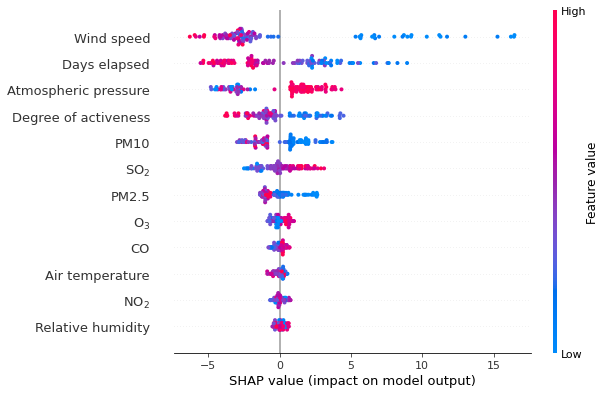

In [135]:
shap.summary_plot(drop_2_shap_values, drop_2_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_2.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_2.svg",format="svg",bbox_inches='tight')

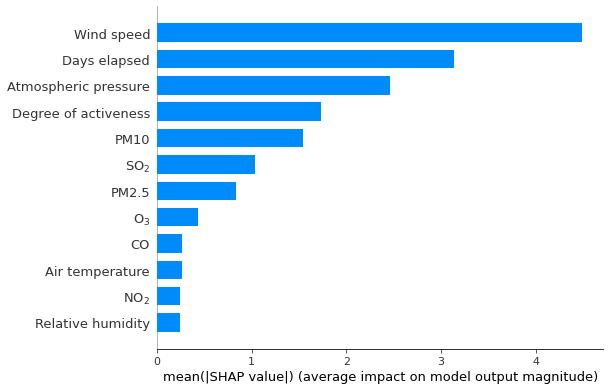

In [136]:
shap.summary_plot(drop_2_shap_values, drop_2_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_2_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_2_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Wave 1 Model

In [137]:
wave_1_X = wave_1.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
wave_1_Y = wave_1['Case'].copy()

In [138]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 8, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [139]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [140]:
model_wave_1 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_wave_1, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(wave_1_X, wave_1_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


[20:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([ 0.81580119,  6.94364877, 16.13856087,  3.47208333,  0.30862379,
        0.18711562,  0.2355917 ,  0.24079924,  0.23199987,  0.216576  ,
        0.16249609,  0.14738836,  0.19117198,  0.41385665,  1.09029751,
       19.99604449]), 'std_fit_time': array([3.65095070e-02, 7.53927448e+00, 2.25467845e-02, 6.21828952e+00,
       5.70236947e-02, 7.14480102e-03, 1.36155568e-02, 1.12673440e-02,
       1.25694252e-02, 2.17234510e-02, 7.70449008e-03, 6.71219328e-03,
       1.12505890e-02, 2.85317443e-01, 9.47924242e-03, 1.48681712e+01]), 'mean_score_time': array([0.115

In [141]:
test5 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [142]:
test5.fit(wave_1_X, wave_1_Y)

[20:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [143]:
r2 = r2_score(wave_1_Y,test5.predict(wave_1_X))
r2

0.968914085402525

In [144]:
test5.get_booster().get_score(importance_type="total_gain")

{'elapsed': 522562.2384311002,
 'ACTV': 61437.24391699999,
 'PM2.5': 22603.511627260003,
 'O3': 45329.32663919998,
 'NO2': 38017.26678839999,
 'WSPD': 15989.127091470002,
 'PRES': 82741.24649931598,
 'CO': 7953.053815000001,
 'SO2': 16462.355112999998,
 'TEMP': 40608.8067437,
 'HUM': 21708.22443629,
 'PM10': 20582.233987999996}

In [145]:
wave_1_p = permutation_importance(test5, wave_1_X, wave_1_Y, n_repeats=10,random_state=0)

In [146]:
wave_1_p

{'importances_mean': array([0.01459664, 0.01034674, 0.02155244, 0.00420018, 0.03802384,
        0.05999962, 0.01813359, 0.08278275, 0.01136667, 0.02960725,
        0.10046059, 1.10194867]),
 'importances_std': array([0.00185097, 0.00157019, 0.00301785, 0.00074595, 0.00341736,
        0.00495667, 0.00213254, 0.008841  , 0.00086577, 0.00325425,
        0.0127262 , 0.0548562 ]),
 'importances': array([[0.01305839, 0.01255297, 0.01382362, 0.01257003, 0.01513767,
         0.01696718, 0.01371064, 0.01686496, 0.0177608 , 0.0135201 ],
        [0.01230897, 0.00764548, 0.01192056, 0.0106903 , 0.00778243,
         0.01115073, 0.01024713, 0.01049358, 0.01194008, 0.00928809],
        [0.01928349, 0.02474952, 0.01777577, 0.02266588, 0.01752513,
         0.02041688, 0.02277262, 0.01901119, 0.02635832, 0.0249656 ],
        [0.00300574, 0.00436775, 0.00529615, 0.00294414, 0.00466273,
         0.00398555, 0.00396308, 0.0040201 , 0.00470148, 0.00505508],
        [0.04011434, 0.03608433, 0.0371412 , 0.034

In [147]:
wave_1_pd = {}

In [148]:
c= 0
for i in labels:
    wave_1_pd[i] = wave_1_p['importances_mean'][c]
    c = c + 1

In [149]:
wave_1_pd

{'PM2.5': 0.01459663558696439,
 'PM10': 0.010346736513699172,
 'SO${_2}$': 0.02155244010900096,
 'CO': 0.004200180411988596,
 'NO${_2}$': 0.038023842600969714,
 'O${_3}$': 0.05999962099640195,
 'Relative humidity': 0.01813358886244788,
 'Atmospheric pressure': 0.08278275056869677,
 'Wind speed': 0.011366670221013031,
 'Air temperature': 0.029607249736286857,
 'Degree of activeness': 0.10046058935367026,
 'Days elapsed': 1.1019486700347254}

In [150]:
explainer_wave_1 = shap.TreeExplainer(test5)

In [151]:
wave_1_shap_values = explainer_wave_1.shap_values(wave_1_X)
print(wave_1_shap_values)

[[ 4.8849088e-01 -1.6780691e-01 -1.0064657e+00 ... -6.4540446e-02
  -1.6239320e+00 -2.0661695e+01]
 [ 7.0398712e-01  4.3411046e-02 -1.0824766e+00 ...  1.5418056e-01
  -1.6095542e+00 -1.7009663e+01]
 [-2.4864685e-02 -5.3416416e-02 -1.1414230e+00 ...  2.1131316e-01
  -1.4656769e+00 -8.5457516e+00]
 ...
 [-1.8117705e-01 -1.7433066e-02  1.1292180e+00 ... -3.6697492e-01
  -1.9995146e+00 -2.2542503e+01]
 [-1.4790516e-01 -5.5684511e-02  5.0838298e-01 ... -4.6067309e-01
  -1.8992915e+00 -2.1989838e+01]
 [-1.4790516e-01 -7.2095580e-03  9.4583547e-01 ...  7.1491018e-02
  -2.2408013e+00 -2.1094809e+01]]


In [152]:
y_base_wave_1 = explainer_wave_1.expected_value
print(y_base_wave_1)


24.030714


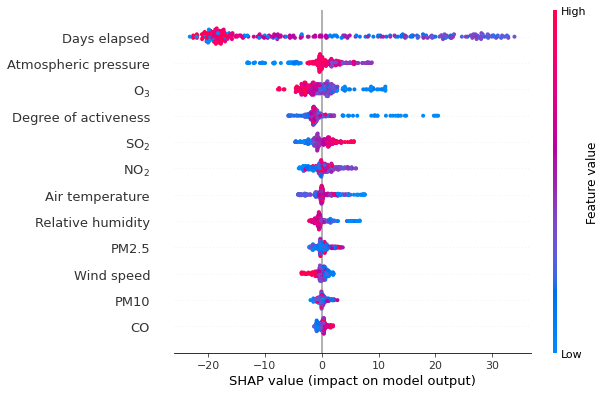

In [153]:
shap.summary_plot(wave_1_shap_values, wave_1_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_1.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_1.svg",format="svg",bbox_inches='tight')

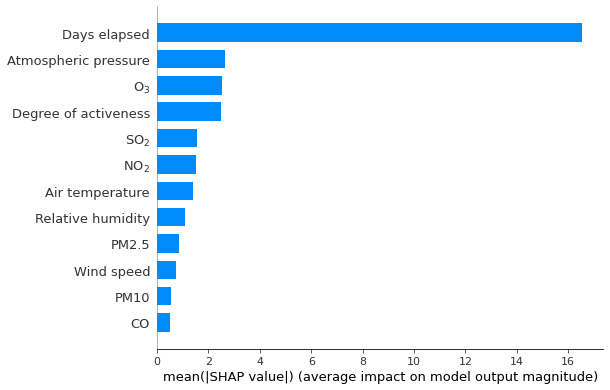

In [154]:
shap.summary_plot(wave_1_shap_values, wave_1_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_1_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_1_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Wave 2 Model

In [155]:
wave_2_X = wave_2.drop(columns = ['MORB%','Case','log(Case+1)','log(MORB%+1)','city','date','Unnamed: 0', 'Unnamed: 0.1'])
wave_2_Y = wave_2['Case'].copy()

In [156]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 4, 'min_child_weight': 8, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [139]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [157]:
model_wave_2 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_wave_2, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(wave_2_X, wave_2_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s


[20:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([ 8.69135733, 11.20371742, 15.14912062,  3.09566865,  0.23159924,
        0.20119185,  0.18710308,  0.22037191,  0.30241218,  0.26220074,
        0.22699947,  0.22827969,  1.00722132, 15.42311001, 50.18143735,
       37.57303953]), 'std_fit_time': array([1.76726054e-01, 3.32848410e+00, 1.98695791e-01, 5.80651926e+00,
       1.81832725e-02, 1.25978302e-02, 9.20145288e-03, 3.00416128e-02,
       6.23737083e-03, 1.59174572e-02, 1.52448894e-02, 4.54675990e-02,
       2.51386996e-01, 1.41104536e+01, 1.09755518e+01, 1.13452080e+01]), 'mean_score_time': array([0.173

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


In [158]:
test6 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [159]:
test6.fit(wave_2_X, wave_2_Y)

[20:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [160]:
r2 = r2_score(wave_2_Y,test6.predict(wave_2_X))
r2

0.9274484456845502

In [161]:
test6.get_booster().get_score(importance_type="total_gain")

{'elapsed': 34908.30310088001,
 'SO2': 2205.4037132000003,
 'O3': 5222.646208339999,
 'PM2.5': 6834.757166170001,
 'CO': 3890.3407461600004,
 'ACTV': 16254.129374299999,
 'WSPD': 13908.600611120006,
 'TEMP': 2432.0821496999993,
 'NO2': 2888.48152364,
 'PRES': 21744.48364802,
 'HUM': 13316.139335010002,
 'PM10': 4972.629014459998}

In [162]:
wave_2_p = permutation_importance(test6, wave_2_X, wave_2_Y, n_repeats=10,random_state=0)

In [163]:
wave_2_p

{'importances_mean': array([0.06576444, 0.03518525, 0.01748076, 0.01001739, 0.01135545,
        0.01762187, 0.16240559, 0.20096206, 0.367497  , 0.01320705,
        0.09787047, 0.53167976]),
 'importances_std': array([0.00887174, 0.00325166, 0.00305868, 0.00114491, 0.00152627,
        0.00350341, 0.02117248, 0.0245632 , 0.02772015, 0.0020644 ,
        0.00811304, 0.04172133]),
 'importances': array([[0.05427439, 0.06464229, 0.0649854 , 0.07464552, 0.08361241,
         0.0690764 , 0.05707286, 0.06276068, 0.05468613, 0.07188836],
        [0.03024416, 0.03824017, 0.04001753, 0.0391627 , 0.03333038,
         0.03355896, 0.03803174, 0.03195515, 0.03233003, 0.03498163],
        [0.01670181, 0.01702537, 0.01343876, 0.01423538, 0.02321915,
         0.01707287, 0.01820029, 0.01988982, 0.02114885, 0.0138753 ],
        [0.0112102 , 0.00902691, 0.01095803, 0.00801164, 0.01170451,
         0.00942036, 0.01097994, 0.00872818, 0.0100765 , 0.0100576 ],
        [0.01116595, 0.00736328, 0.01246321, 0.012

In [164]:
wave_2_pd = {}

In [165]:
c= 0
for i in labels:
    wave_2_pd[i] = wave_2_p['importances_mean'][c]
    c = c + 1

In [166]:
wave_2_pd

{'PM2.5': 0.06576444378283518,
 'PM10': 0.035185245741927475,
 'SO${_2}$': 0.01748076154885857,
 'CO': 0.010017388208694588,
 'NO${_2}$': 0.011355447012176657,
 'O${_3}$': 0.017621868338748646,
 'Relative humidity': 0.16240558720399506,
 'Atmospheric pressure': 0.20096206388219065,
 'Wind speed': 0.36749699960877535,
 'Air temperature': 0.01320704741366121,
 'Degree of activeness': 0.09787046638669461,
 'Days elapsed': 0.5316797648448213}

In [167]:
explainer_wave_2 = shap.TreeExplainer(test6)

In [168]:
wave_2_shap_values = explainer_wave_2.shap_values(wave_2_X)
print(wave_2_shap_values)

[[-0.21822885 -0.28231698 -0.33046064 ...  0.2820403  -0.8516057
  -5.5684657 ]
 [ 0.4047719  -0.18623099 -0.31516883 ...  0.1083417   0.01355268
  -5.25819   ]
 [-0.14344846 -0.06732195 -0.6400765  ...  0.08418908 -0.39768812
  -5.164475  ]
 ...
 [-1.3520377  -0.26564148 -0.10411268 ... -0.03012823 -0.46126637
  -0.54732645]
 [-1.6517695   0.10124022 -0.14550287 ... -0.04668614 -0.39295194
  -0.5474715 ]
 [-1.6027313  -0.2271504  -0.10004067 ... -0.14285547 -0.23028013
  -0.6566383 ]]


In [169]:
y_base_wave_2 = explainer_wave_2.expected_value
print(y_base_wave_2)


6.226051


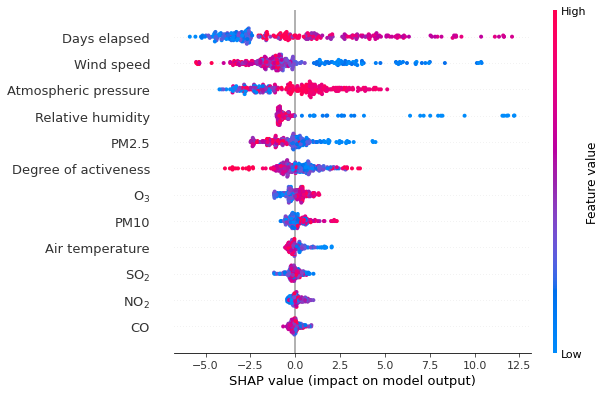

In [170]:
shap.summary_plot(wave_2_shap_values, wave_2_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_2.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_2.svg",format="svg",bbox_inches='tight')

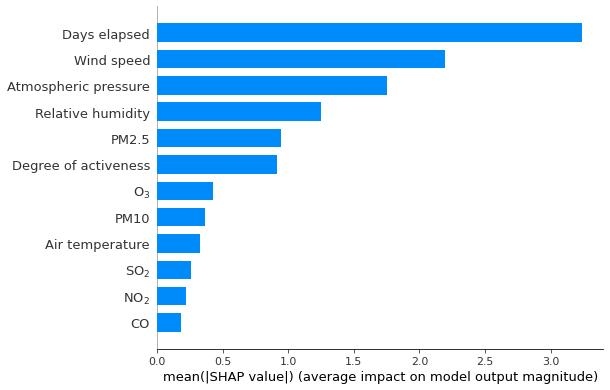

In [171]:
shap.summary_plot(wave_2_shap_values, wave_2_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_2_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_wave_2_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 Surge ALL Model

In [173]:
surge_total_X = pd.concat([surge_1_X,surge_2_X])
surge_total_Y = pd.concat([surge_1_Y,surge_2_Y])

In [188]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 3, 'min_child_weight': 6, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [178]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [179]:
model_surge_total = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_surge_total, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(surge_total_X, surge_total_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min


[21:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([19.90795879, 36.02141285, 19.08530173,  6.18579206, 12.11642842,
        5.04801049,  0.31619964,  0.33200026,  0.54007006,  1.23221469,
       26.85734873, 46.95166459,  6.38842416, 10.58689651,  7.98908372,
        0.42525544]), 'std_fit_time': array([7.89979499e+00, 1.20161827e+00, 1.36165423e+01, 5.08296882e-01,
       1.64984690e+00, 3.86544951e+00, 9.39074420e-03, 1.95435185e-02,
       3.08240151e-01, 2.50366189e-01, 2.01764353e+01, 9.98010994e-01,
       3.01279862e+00, 2.70755075e+00, 4.18463469e+00, 4.89906737e-01]), 'mean_score_time': array([0.244

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


In [189]:
test7 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [190]:
test7.fit(surge_total_X, surge_total_Y)

[21:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [191]:
r2 = r2_score(surge_total_Y,test7.predict(surge_total_X))
r2

0.9524204460568767

In [192]:
test7.get_booster().get_score(importance_type="total_gain")

{'elapsed': 403500.5414112999,
 'PM2.5': 16034.845628999998,
 'HUM': 53342.174305882,
 'TEMP': 44330.20710810001,
 'ACTV': 52652.55620825998,
 'SO2': 23057.931969999998,
 'NO2': 18145.7807042,
 'WSPD': 7294.167889200001,
 'CO': 4516.3672745,
 'PM10': 4792.8780864,
 'O3': 14706.277998899994,
 'PRES': 20117.596559200003}

In [193]:
surge_total_p = permutation_importance(test7, surge_total_X, surge_total_Y, n_repeats=10,random_state=0)

In [194]:
surge_total_p

{'importances_mean': array([0.00803408, 0.00416734, 0.0346317 , 0.00420322, 0.0182053 ,
        0.0275341 , 0.0669708 , 0.03603937, 0.0148173 , 0.04874288,
        0.08357988, 0.93367752]),
 'importances_std': array([0.00148632, 0.00082424, 0.00605966, 0.0009829 , 0.00324749,
        0.00308703, 0.00581696, 0.00454019, 0.00339254, 0.0079403 ,
        0.00499042, 0.05073252]),
 'importances': array([[0.00648372, 0.00720925, 0.01034085, 0.00679101, 0.00601721,
         0.0086874 , 0.00708274, 0.00803565, 0.00955318, 0.01013978],
        [0.00241309, 0.00411732, 0.00378829, 0.00406892, 0.00499292,
         0.00481772, 0.00418992, 0.00335929, 0.00548079, 0.00444515],
        [0.02556018, 0.04154644, 0.04057142, 0.03725369, 0.02704908,
         0.02757659, 0.03873225, 0.03291551, 0.03251606, 0.0425958 ],
        [0.00455255, 0.00521749, 0.00394589, 0.00266439, 0.00510036,
         0.00482964, 0.00219211, 0.00430311, 0.00510714, 0.00411948],
        [0.0191019 , 0.01493353, 0.01895714, 0.011

In [195]:
surge_total_pd = {}

In [196]:
c= 0
for i in labels:
    surge_total_pd[i] = surge_total_p['importances_mean'][c]
    c = c + 1

In [197]:
surge_total_pd

{'PM2.5': 0.008034078765339892,
 'PM10': 0.004167341960762494,
 'SO${_2}$': 0.03463170251369383,
 'CO': 0.004203215082076317,
 'NO${_2}$': 0.01820530338153198,
 'O${_3}$': 0.027534098041619735,
 'Relative humidity': 0.06697080057594852,
 'Atmospheric pressure': 0.03603937036216218,
 'Wind speed': 0.014817300701984493,
 'Air temperature': 0.04874288276502139,
 'Degree of activeness': 0.08357987754942678,
 'Days elapsed': 0.9336775218522793}

In [198]:
explainer_surge_total = shap.TreeExplainer(test7)

In [199]:
surge_total_shap_values = explainer_surge_total.shap_values(surge_total_X)
print(surge_total_shap_values)

[[-0.3389194   0.08933178 -2.5333269  ...  1.1440448  -1.372765
  -9.088208  ]
 [-0.19511247 -0.01257077 -2.5618901  ...  1.1456829  -1.3738649
  -6.6484737 ]
 [-0.2304389   0.05397711 -2.5618901  ...  1.194406   -1.1702061
  -0.4866408 ]
 ...
 [-0.51977164 -0.02324395  1.5327578  ... -0.52685016 -2.5455542
  -1.8081734 ]
 [-0.51977164 -0.0091107   1.5327578  ... -0.52685016 -2.517861
   0.7567604 ]
 [-0.21068119  0.09588332  1.3836057  ... -0.52685016 -2.517861
   0.41323984]]


In [200]:
y_base_surge_total = explainer_surge_total.expected_value
print(y_base_surge_total)


15.614737


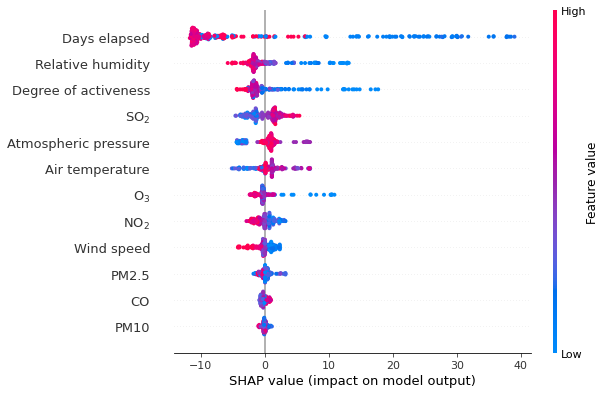

In [201]:
shap.summary_plot(surge_total_shap_values, surge_total_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_total.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_total.svg",format="svg",bbox_inches='tight')

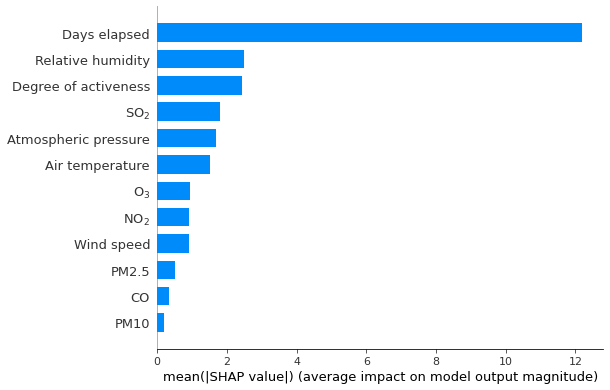

In [202]:
shap.summary_plot(surge_total_shap_values, surge_total_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_total_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_surge_total_bar.svg",format="svg",bbox_inches='tight')

# Cluster 1 drop ALL Model

In [203]:
drop_total_X = pd.concat([drop_1_X,drop_2_X])
drop_total_Y = pd.concat([drop_1_Y,drop_2_Y])

In [211]:
init_params = {'learning_rate': 0.1, 'n_estimators':50 ,'max_depth': 2, 'min_child_weight': 9, 
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [73]:
cv_params = {'n_estimators':range(50,500,50)}

In [81]:
cv_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [205]:
cv_params = {'max_depth': range(2,6,1), 'min_child_weight': range(6,10,1)}

In [256]:
cv_params = {'max_depth': [1,2,3,4], 'min_child_weight':[12,13,14,15,16] }

In [94]:
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1]}

In [96]:
cv_params = {'subsample': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1]}

In [99]:
cv_params = {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]}

In [102]:
cv_params = {'learning_rate': [0.01, 0.03,0.05, 0.07, 0.1, 0.2,0.3]}

In [206]:
model_drop_total = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)
optimized_xgb = GridSearchCV(estimator=model_drop_total, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_xgb.fit(drop_total_X, drop_total_Y)
evalute_result = optimized_xgb.cv_results_
print('Results for each iteration:{0}'.format(evalute_result))
print('Best parameters：{0}'.format(optimized_xgb.best_params_))
print('Best score:{0}'.format(optimized_xgb.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s


[21:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Results for each iteration:{'mean_fit_time': array([0.9193965 , 0.62098927, 0.66511316, 0.25642982, 0.28951674,
       0.30928998, 0.32401886, 0.29457297, 0.46312847, 0.40680032,
       0.34079924, 0.31255279, 0.36845503, 0.3551055 , 0.35429049,
       0.2947474 ]), 'std_fit_time': array([0.46454475, 0.11206667, 0.03751016, 0.1060048 , 0.03581735,
       0.01410245, 0.00767763, 0.01796233, 0.01933016, 0.06041211,
       0.00630367, 0.01618754, 0.01246836, 0.00719812, 0.01235714,
       0.03237885]), 'mean_score_time': array([0.02777157, 0.03903542, 0.01160011, 0.00776634, 0.00580006,
       0.00879865, 0.0096

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.1s finished


In [212]:
test8 = xgb.XGBRegressor(booster='gbtree',objective = 'reg:squarederror', silent=False, seed=0,**init_params)

In [213]:
test8.fit(drop_total_X, drop_total_Y)

[21:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [214]:
r2 = r2_score(drop_total_Y,test8.predict(drop_total_X))
r2

0.7917949641732642

In [215]:
test8.get_booster().get_score(importance_type="total_gain")

{'elapsed': 244598.04993700003,
 'ACTV': 68137.70821100002,
 'WSPD': 13850.795337999998,
 'O3': 31486.741517,
 'PM2.5': 13390.040949,
 'NO2': 12545.657925,
 'SO2': 14337.454247999998,
 'TEMP': 13033.591429999999,
 'PRES': 27585.986355,
 'CO': 2183.086788,
 'HUM': 1251.756959,
 'PM10': 1998.5270679999999}

In [216]:
drop_total_p = permutation_importance(test8, drop_total_X, drop_total_Y, n_repeats=10,random_state=0)

In [217]:
drop_total_p

{'importances_mean': array([0.02880169, 0.00227255, 0.02926863, 0.00307471, 0.02185583,
        0.06106068, 0.00323585, 0.07794962, 0.0285337 , 0.02717974,
        0.10439074, 0.83959152]),
 'importances_std': array([0.00418652, 0.0006719 , 0.0041449 , 0.00121254, 0.00294275,
        0.00689001, 0.0004913 , 0.00537544, 0.0041412 , 0.00305102,
        0.00557536, 0.033809  ]),
 'importances': array([[3.67627267e-02, 2.93420663e-02, 3.27202685e-02, 2.24887961e-02,
         3.01341452e-02, 3.23449712e-02, 2.58036411e-02, 2.78653663e-02,
         2.33596225e-02, 2.71953018e-02],
        [1.79050416e-03, 2.38050808e-03, 2.88938985e-03, 3.78161442e-03,
         1.58523361e-03, 1.70356529e-03, 1.40060468e-03, 2.47158652e-03,
         2.33940693e-03, 2.38310061e-03],
        [3.20474994e-02, 2.81086764e-02, 2.39799111e-02, 3.43951290e-02,
         2.51480317e-02, 2.98691129e-02, 2.81629498e-02, 2.45323462e-02,
         3.74781011e-02, 2.89645861e-02],
        [3.84505918e-03, 2.77100161e-03, 3

In [218]:
drop_total_pd = {}

In [219]:
c= 0
for i in labels:
    drop_total_pd[i] = drop_total_p['importances_mean'][c]
    c = c + 1

In [220]:
drop_total_pd

{'PM2.5': 0.028801690564330563,
 'PM10': 0.0022725514132564406,
 'SO${_2}$': 0.029268634386721015,
 'CO': 0.0030747082326792797,
 'NO${_2}$': 0.02185582559177358,
 'O${_3}$': 0.06106068052041926,
 'Relative humidity': 0.0032358467234335996,
 'Atmospheric pressure': 0.0779496163241695,
 'Wind speed': 0.028533703216573468,
 'Air temperature': 0.02717974416712815,
 'Degree of activeness': 0.10439074074108637,
 'Days elapsed': 0.8395915187267573}

In [221]:
explainer_drop_total = shap.TreeExplainer(test8)

In [222]:
drop_total_shap_values = explainer_drop_total.shap_values(drop_total_X)
print(drop_total_shap_values)

[[-0.6700194   0.38385436  2.0044453  ... -0.92694855  1.342753
  29.884523  ]
 [-0.71130764  0.33760458  0.9861542  ... -0.92694855  1.3965601
  29.884523  ]
 [-0.31889102 -0.38103494 -0.05131387 ... -0.98306745  1.3154634
  28.345293  ]
 ...
 [-1.047292   -0.16990945  1.2775269  ... -0.3009351  -3.127158
  -6.2467794 ]
 [-1.047292   -0.28823483  1.2775269  ... -0.3009351  -2.1161947
  -5.731079  ]
 [-1.2198896  -0.16990945  1.2962941  ... -0.1969708  -1.9435971
  -5.5712757 ]]


In [223]:
y_base_drop_total = explainer_drop_total.expected_value
print(y_base_drop_total)


15.034451


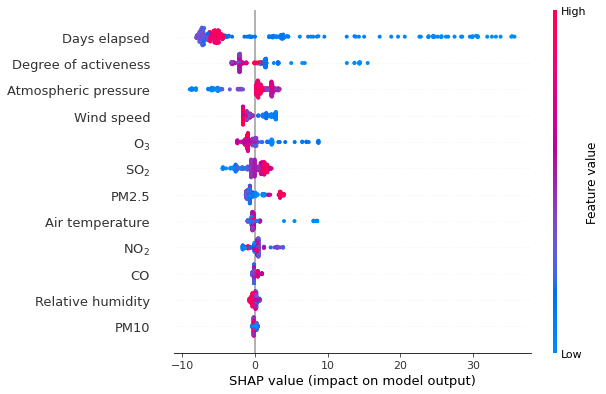

In [224]:
shap.summary_plot(drop_total_shap_values, drop_total_X,feature_names=labels,show=False)

plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_total.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_total.svg",format="svg",bbox_inches='tight')

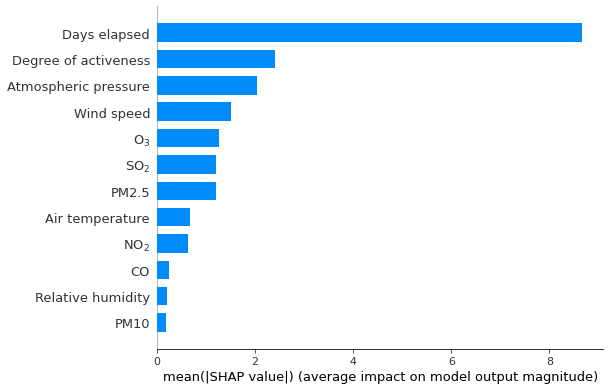

In [225]:
shap.summary_plot(drop_total_shap_values, drop_total_X, feature_names=labels, plot_type="bar",show=False)
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_total_bar.png",format="png",bbox_inches='tight')
plt.savefig("../../covid-proj/new_figs/segments/m3/shap_moving3_cluster1_drop_total_bar.svg",format="svg",bbox_inches='tight')